# Lab 03: Fun with `pandas`!

Below are some exercises to get you working with `pandas` to manipulate data. As always, get as far as you can, and ask for help when you need it! Your teacher (me), you instructor, and your classmates are all here to help each other get better at coding. Getting the code to work is important, but do also take the time to make sure you understand what the commands are doing. This time, (with the exception of the Stroop challenge), all I've given you is the code to download the data. Then you are on your own. For the Stroop challenge, I gave the you code for the first step—after that, it's up to you :-)

In [73]:
import pandas as pd

## Music sales challenge

Write a script that:

1. Combines the tables of best-selling physical singles and best-selling digital singles on the Wikipedia page "List_of_best-selling_singles"
2. Adds a column which marks whether each row is from the list of physical singles or digital singles
3. Outputs the artist and single name for the year you were born. If there is no entry for that year, take the closest year after you were born.
4. Outputs the artist and single name for the year you were 15 years old.

In [74]:
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_best-selling_singles")
physical = pd.concat([tables[0], tables[1]])
digital = pd.concat([tables[3], tables[4]])

physical["Medium"] = "physical"
digital["Medium"] = "digital"

dataset = pd.concat([physical, digital]).reset_index(drop=True)
dataset

,Artist,Single,Released,Sales (in millions),Source,Medium
0,Bing Crosby,"""White Christmas""",1942,50,[1],physical
1,Elton John,"""Something About the Way You Look Tonight""/""Ca...",1997,33,[1],physical
2,Bing Crosby,"""Silent Night""",1935,30,[2],physical
3,Tino Rossi,"""Petit Papa Noël""",1946,30,[3],physical
4,Bill Haley & His Comets,"""Rock Around the Clock""",1954,25,[4][5],physical
...,...,...,...,...,...,...
100,Bruno Mars,"""Grenade""",2010,10.2,[68],digital
101,Mike Posner,"""I Took a Pill in Ibiza""",2015,10[a],[51],digital
102,Shakira featuring Freshlyground,"""Waka Waka (This Time for Africa)""",2010,10,[77],digital
103,Shakira featuring Wyclef Jean,"""Hips Don't Lie""",2006,10,[78],digital


In [75]:
dataset[dataset["Released"] == 1998][["Artist", "Single"]]

,Artist,Single
25,Cher,"""Believe"""
42,Britney Spears,"""...Baby One More Time"""


In [76]:
dataset[dataset["Released"] == 1998 + 15][["Artist", "Single"]]

,Artist,Single
65,Robin Thicke featuring T.I. and Pharrell,"""Blurred Lines"""
69,Pharrell Williams,"""Happy"""
74,Katy Perry featuring Juicy J,"""Dark Horse"""
81,John Legend,"""All of Me"""
89,Avicii featuring Aloe Blacc,"""Wake Me Up"""
93,Idina Menzel,"""Let It Go"""
99,Lorde,"""Royals"""


## Space challenge

1. Make a single dataframe that combines the space missions from the 1950's to the 2020's
2. Write a script that returns the year with the most launches
3. Write a script that returns the most common month for launches
4. Write a script that ranks the months from most launches to fewest launches


In [77]:
tables = pd.read_html("https://en.wikipedia.org/wiki/Timeline_of_Solar_System_exploration", match= "Mission name")

dataset = pd.concat(tables)
dataset["Year"] = dataset["Launch date"].apply(lambda date: int(date.split(" ")[-1]))
dataset["Month"] = dataset["Launch date"].apply(lambda date: date.split(" ")[-2])
dataset["Decade"] = dataset["Year"].apply(lambda year: str(10 * (year // 10)) + "s")
dataset

,Mission name,Launch date,Description,Ref(s),Year,Month,Decade
0,Sputnik 1,4 October 1957,First Earth orbiter,[1][2],1957,October,1950s
1,Sputnik 2,3 November 1957,"Earth orbiter, first animal in orbit, a dog na...",[2][3][4],1957,November,1950s
2,Explorer 1,1 February 1958,Earth orbiter; discovered Van Allen radiation ...,[5],1958,February,1950s
3,Vanguard 1,17 March 1958,Earth orbiter; oldest spacecraft still in Eart...,[6],1958,March,1950s
4,Luna 1,2 January 1959,First lunar flyby (attempted lunar impact?); f...,[7][8][9][10],1959,January,1950s
...,...,...,...,...,...,...,...
18,Peregrine Mission One (including Iris and Colm...,8 January 2024,Lunar lander and rovers (landing precluded),[504],2024,January,2020s
19,IM-1 Nova-C Odysseus (including EagleCam deplo...,15 February 2024,Lunar landers,[505],2024,February,2020s
20,DRO A/B,13 March 2024,Lunar orbiters,[506],2024,March,2020s
21,Queqiao-2 (including Tiandu-1 and 2),20 March 2024,Lunar orbiters,[507],2024,March,2020s


In [78]:
dataset.value_counts("Year").idxmax()

1965

In [79]:
dataset.value_counts("Month").idxmax()

'November'

In [80]:
dataset.value_counts("Month").rename("Occurences").to_frame()

,Occurences
Month,
November,30
August,27
October,22
September,22
July,21
December,19
January,19
May,17
March,15


## Supervillain challenge

1. Write a script that combines the tables showing supervillain debuts from the 30's through the 2010's
2. Write a script that ranks each decade in terms of how many supervillains debuted in that decade
3. Write a script that ranks the different comics companies in terms of how many supervillains they have, and display the results in a nice table (pandas dataframe)

In [81]:
tables = pd.read_html("https://en.wikipedia.org/wiki/List_of_comic_book_supervillain_debuts", match= "Character / Team")
dataset = pd.concat(tables)

dataset["Year"] = dataset["Year Debuted"].str.extract("(\d{4})").astype(int)
dataset["Decade"] = dataset["Year"].apply(lambda year: str(10 * (year // 10)) + "s")

dataset

,Character / Team,Year Debuted,Company,Creator/s,First Appearance,Year,Decade
0,Ultra-Humanite,1939 (June),DC,"Jerry Siegel, Joe Shuster",Action Comics (vol. 1) #13,1939,1930s
1,Dr. Death,1939 (July),DC,"Bob Kane, Bill Finger",Detective Comics (vol. 1) #29,1939,1930s
2,The Monk,1939 (September),DC,"Bob Kane, Bill Finger",Detective Comics (vol. 1) #31,1939,1930s
3,The Claw,1939 (December),Lev Gleason Publications,Jack Cole,Silver Streak Comics #1,1939,1930s
0,Hath-Set,1940 (January),DC,"Gardner Fox, Dennis Neville",Flash Comics #1,1940,1940s
...,...,...,...,...,...,...,...
4,Bloodwork,2016 (August),DC,Brian Buccellato,The Flash #28,2016,2010s
5,Godspeed,2016 (August),DC,"Joshua Williamson, Carmine Di Giandomenico",The Flash: Rebirth #1,2016,2010s
6,The Hamster (Mr. Hansen),2017,Disney/Hyperion,Rhode Montijo,The Gumazing Gum Girl! Book 2: Gum Luck,2017,2010s
7,The Underhander,2019,Disney/Hyperion,Rhode Montijo,The Gumazing Gum Girl! Book 4: Cover Blown!,2019,2010s


In [82]:
dataset["Decade"].value_counts().rename("Debuts").to_frame()

,Debuts
1960s,228
1970s,97
1980s,92
1990s,84
2000s,49
1940s,47
1950s,26
2010s,9
1930s,4


In [83]:
dataset.groupby("Company")["Character / Team"].count().sort_values(ascending = False).rename("Characters").to_frame()

,Characters
Company,
DC,338
Marvel,264
Fawcett Comics/DC,6
Dark Horse,5
Image,5
Disney/Hyperion,4
Marvel/Timely,4
Eternity,3
Comico,1


## Stroop challenge

Every year between 2015 and 2021, the students in my Language, Cognition, and the Brain-course participated in a version of the Stroop task. Using a stopwatch (ok, using their phones), they recorded how fast they could say a list of things (either reading or naming colors or color words). The column names mean "Reading with No Interference", "Naming with Interference", "Naming with No Interference", and "Reading with Interference". The times are in seconds.

### Stroop challenge 1: 
Transform these data from wide format to long format, so that the result is a dataframe with
- 1 column named "Participant_id" with a unique number for each participant (you can use the row indices)
- 1 column named "Year" with the year data
- 1 column named "Task" that shows which task they were doing
- 1 column named "RT" that shows their response time

In [84]:
dataset = pd.read_csv("https://raw.githubusercontent.com/ethanweed/Stroop/master/Stroop-raw-over-the-years.csv")
dataset

,Reading_NoInt,Naming_Int,Naming_NoInt,Reading_Int,Year
0,4.16,6.76,4.45,4.65,2015
1,4.35,7.73,4.78,4.46,2015
2,3.60,7.00,4.00,3.50,2015
3,3.90,9.03,4.60,6.30,2015
4,4.22,9.98,6.83,6.24,2015
...,...,...,...,...,...
177,4.30,7.08,6.25,4.28,2021
178,4.75,9.66,6.12,5.49,2021
179,4.98,7.52,6.73,5.16,2021
180,5.16,8.81,8.19,5.51,2021


In [85]:
dataset_long = pd.melt(
    dataset.reset_index(names = "Participant_ID"), 
    id_vars=("Participant_ID", "Year")
).rename(columns = dict(variable = "Task", value = "RT"))

dataset_long

,Participant_ID,Year,Task,RT
0,0,2015,Reading_NoInt,4.16
1,1,2015,Reading_NoInt,4.35
2,2,2015,Reading_NoInt,3.60
3,3,2015,Reading_NoInt,3.90
4,4,2015,Reading_NoInt,4.22
...,...,...,...,...
723,177,2021,Reading_Int,4.28
724,178,2021,Reading_Int,5.49
725,179,2021,Reading_Int,5.16
726,180,2021,Reading_Int,5.51


## Stroop challenge 2 (Advanced!!!):

Make a new dataframe which shows the mean response time (in seconds) for each task for each year.

In [86]:
mean_response_times = dataset_long.groupby(["Task", "Year"])["RT"].mean().round(2).to_frame()
mean_response_times

RT
Task          Year       
Naming_Int    2015   8.62
              2016   8.86
              2017   9.31
              2018   9.37
              2019   9.54
              2020   9.74
              2021  10.11
Naming_NoInt  2015   5.12
              2016   5.41
              2017   5.77
              2018   5.30
              2019   6.35
              2020   5.96
              2021   6.39
Reading_Int   2015   4.45
              2016   5.34
              2017   5.49
              2018   4.94
              2019   6.09
              2020   4.96
              2021   7.04
Reading_NoInt 2015   3.95
              2016   4.08
              2017   4.41
              2018   3.89
              2019   4.94
              2020   4.40
              2021   4.84

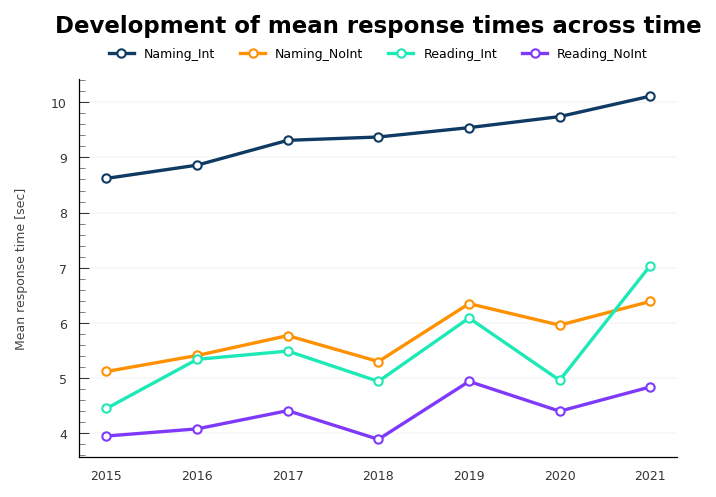

In [87]:
import matplotlib.pyplot as plt
plt.style.use("minimal.mplstyle")

for task, data in mean_response_times.reset_index(level = 1).groupby("Task"):
    plt.plot(data["Year"], data["RT"], label = task)

plt.legend(
    loc = "lower center", 
    bbox_to_anchor = (0.5, 1.02), 
    ncol = len(mean_response_times.index.levels[0]),
)
plt.title("Development of mean response times across time", y = 1.05, va = "bottom")
plt.margins(x = 0.05)
plt.tick_params("x", bottom = False)
plt.gca().yaxis.minorticks_on()
plt.ylabel("Mean response time [sec]")
plt.show()